
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


In [79]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para visualización de datos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para cargar los datos
# -----------------------------------------------------------------------
import pickle

# Para sistemas de recomendacion basados en cotenido
# -----------------------------------------------------------------------
from scipy.spatial.distance import pdist , squareform   # Para calcular la distancia entre puntos 

# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import soporte_sistemas_recomendacion as sr

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [80]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para visualización de datos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para cargar los datos
# -----------------------------------------------------------------------
import pickle

# Para sistemas de recomendacion basados en cotenido
# -----------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer # Vectorizacion / tokenizacion 
from sklearn.metrics.pairwise import cosine_similarity #  Cosine Similarity post Vectorizacion

# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import soporte_sistemas_recomendacion as sr

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [81]:
import string

## Caso 1: Sistema de recomendación basado en contenidos

In [82]:
df_cont = pd.read_csv('datos/games_description.csv')
df_cont.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


En géneros unimos todo en una cadena de texto sin símbolos y lo juntaremos con la short description. La descripción larga contiene más cosas que pueden ser irrelevantes por lo que nos quedamos con la corta.

La descripción corta tiene algún nulo por lo que los rellenamos con una cadena de texto vacía

In [83]:
df_cont['short_description'].isna().sum()

np.int64(13)

In [84]:
df_cont['short_description'].fillna('', inplace=True)

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_5201/3346194494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cont['short_description'].fillna('', inplace=True)


In [85]:
df_cont["genres"] = df_cont["genres"].str.replace(f"[{string.punctuation}]", "", regex=True)
df_cont["short_description"] = df_cont["short_description"].str.replace(f"[{string.punctuation}]", "", regex=True)

Lo juntamos todo en una nueva columna

In [86]:
df_cont['info'] = df_cont["genres"] + df_cont["short_description"]

Realizamos la vectorización y calculamos las distancias

In [87]:
vectorizer = CountVectorizer(max_features=1000,stop_words= "english")
X = vectorizer.fit_transform(df_cont['info']).toarray()
similarity = cosine_similarity(X)

In [88]:
similarity

array([[1.        , 0.11864475, 0.30439039, ..., 0.12598816, 0.11785113,
        0.12028131],
       [0.11864475, 1.        , 0.24002134, ..., 0.0717496 , 0.0335578 ,
        0.08219949],
       [0.30439039, 0.24002134, 1.        , ..., 0.17699808, 0.09933993,
        0.18925832],
       ...,
       [0.12598816, 0.0717496 , 0.17699808, ..., 1.        , 0.13363062,
        0.25458754],
       [0.11785113, 0.0335578 , 0.09933993, ..., 0.13363062, 1.        ,
        0.20412415],
       [0.12028131, 0.08219949, 0.18925832, ..., 0.25458754, 0.20412415,
        1.        ]])

Veamos si está mi juego favorito

In [89]:
df_cont[df_cont['name'] == 'Hollow Knight']

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,info
55,Hollow Knight,Forge your own path in Hollow Knight An epic a...,About This Game\nHollow Knight Expands with Fr...,Metroidvania Soulslike Platformer Great Soundt...,"['OS *: Windows 7 (64bit)', 'Processor: Intel ...","['OS: Windows 10 (64bit)', 'Processor: Intel C...","24 Feb, 2017",['Team Cherry'],['Team Cherry'],Overwhelmingly Positive,"(329,268)","136,283",https://store.steampowered.com/app/367520/Holl...,Metroidvania Soulslike Platformer Great Soundt...


Vamos ahora a pasar varios juegos que me gustan

In [90]:
game_user = ['Hollow Knight', 'Stardew Valley', 'Kerbal Space Program']

/Users/javi/Documents/Hackio/Laboratorios/Laboratorio-Sistemas-Recomendacion/src/soporte_sistemas_recomendacion.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/Users/javi/Documents/Hackio/Laboratorios/Laboratorio-Sistemas-Recomendacion/src/soporte_sistemas_recomendacion.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/Users/javi/Documents/Hackio/Laboratorios/Laboratorio-Sistemas-Recomendacion/src/soporte_sistemas_recomendacion.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


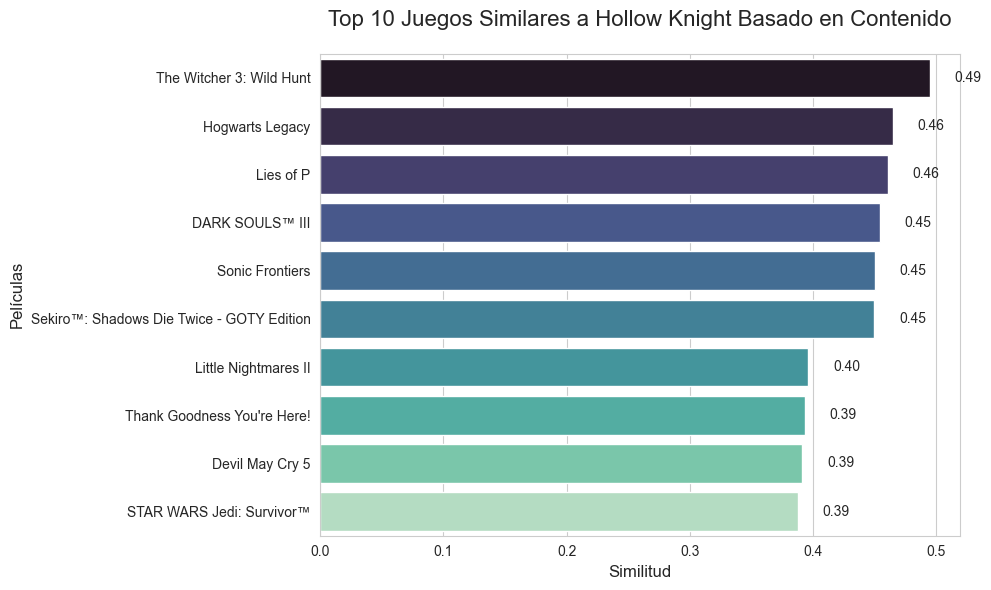

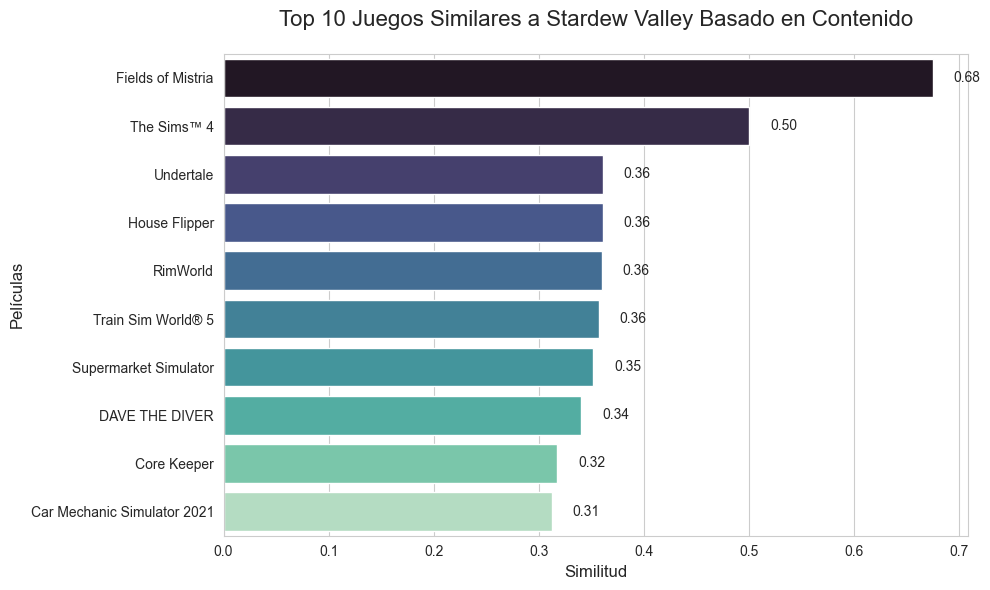

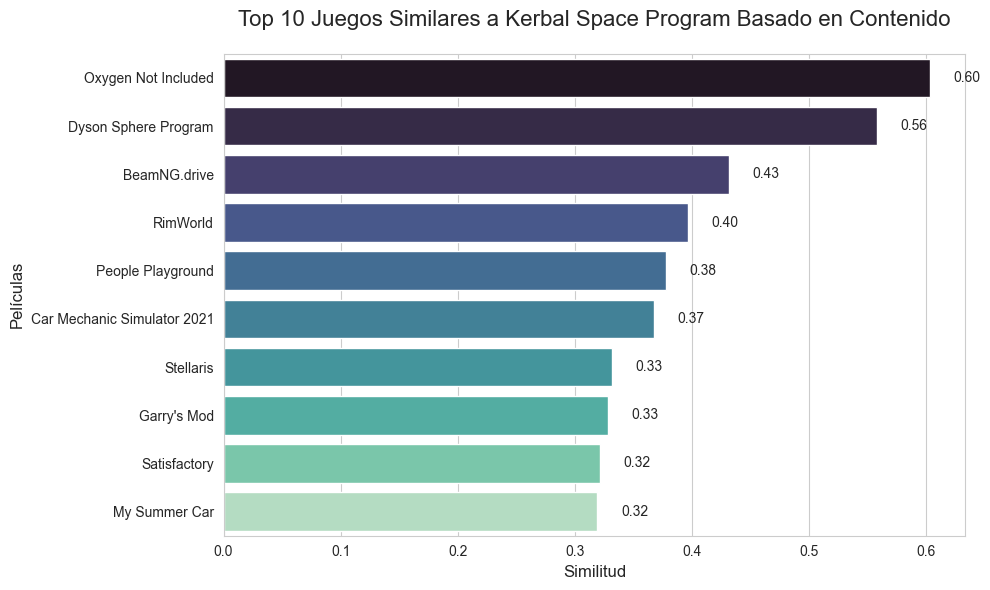

In [91]:
for game in game_user:

    sr.top_10_games(game, df_cont, similarity, plot=True)

## Caso 2: Sistema de recomendación basado en popularidad

In [92]:
df_rank = pd.read_csv('datos/games_ranking.csv')

Vamos a juntar ambos dataframes

In [93]:
df_merged = df_cont.merge(df_rank, how='left', left_on='name', right_on='game_name')

In [94]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     656 non-null    object
 1   short_description                        656 non-null    object
 2   long_description                         656 non-null    object
 3   genres                                   656 non-null    object
 4   minimum_system_requirement               656 non-null    object
 5   recommend_system_requirement             656 non-null    object
 6   release_date                             656 non-null    object
 7   developer                                656 non-null    object
 8   publisher                                656 non-null    object
 9   overall_player_rating                    656 non-null    object
 10  number_of_reviews_from_purchased_people  656 non-null    objec

In [95]:
df_merged['number_of_reviews_from_purchased_people'].sample(5)

560        (2,900)
397      (249,828)
72     (1,121,920)
300       (72,759)
3        (654,820)
Name: number_of_reviews_from_purchased_people, dtype: object

In [96]:
df_merged['number_of_english_reviews'].sample(5)

267     14,237
157    356,622
569      2,606
8       51,931
3       51,931
Name: number_of_english_reviews, dtype: object

Parece que `number_of_english_reviews` nos va a proporcionar mejor información que `number_of_reviews_from_purchased_people`, por lo que vamos a utilizarla junto con `overall_player_rating`.

Antes de nada hay que limpiar estas columnas ya que son de tipo objeto.

In [97]:
df_merged['number_of_english_reviews'] = df_merged['number_of_english_reviews'].str.replace(',', '').astype(int)

`overall_player_rating` tenemos que cambiarlas con un diccionario (o podríamos hacer un ordinal encoding)

In [98]:
dc_player_rating = {
    'Overwhelmingly Positive': 10,
    'Very Positive': 9,
    'Mostly Positive': 7,
    'Positive': 6,
    'Mixed': 4,
    'Mostly Negative': 2,
    'Very Negative': 0,
    '7 user reviews': None,
    '1 user reviews': None,
    '6 user reviews': None,
    '4 user reviews': None
}

In [99]:
df_merged['overall_player_rating'].replace(dc_player_rating, inplace=True)

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_5201/3177419563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['overall_player_rating'].replace(dc_player_rating, inplace=True)
/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_5201/3177419563.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [104]:
df_agrupado = df_merged.groupby(["genre", "game_name"])[["number_of_english_reviews", "overall_player_rating"]].mean().reset_index()

In [ ]:
def recomendador(df, criterio, genero, num=10):
    # En función del criterio ordenamos primero por él y luego por el otro

    if criterio=='overall_player_rating':

        return df[df['genre'] == genero].sort_values(by=[criterio, 'number_of_english_reviews'], ascending=False).head(num)
    
    elif criterio=='number_of_english_reviews':

        return df[df['genre'] == genero].sort_values(by=[criterio, 'overall_player_rating'], ascending=False).head(num)

Ahora podemos recomendar en función del género y de si queremos que sea por número de reviews o por valoración

In [106]:
df_agrupado['genre'].unique()

array(['Action', 'Adventure', 'Role-Playing', 'Simulation',
       'Sports & Racing', 'Strategy'], dtype=object)

In [107]:
criterio = 'overall_player_rating'
genero = 'Simulation'

# Ejemplo
recomendador(df_agrupado, criterio, genero, 30)

,genre,game_name,number_of_english_reviews,overall_player_rating
211,Simulation,Garry's Mod,548369.0,10.0
233,Simulation,Stardew Valley,377167.0,10.0
239,Simulation,The Forest,188898.0,10.0
224,Simulation,People Playground,154929.0,10.0
190,Simulation,BeamNG.drive,153049.0,10.0
206,Simulation,Euro Truck Simulator 2,152873.0,10.0
228,Simulation,RimWorld,117731.0,10.0
229,Simulation,Satisfactory,105046.0,10.0
184,Simulation,American Truck Simulator,88406.0,10.0
216,Simulation,Kerbal Space Program,84199.0,10.0
